## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv("sales_stock_temp.csv")
X = dataset.drop(columns=["Unnamed: 0", "estimated_stock_pct"])
y = dataset["estimated_stock_pct"]

In [11]:
print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


In [12]:
K = 10
split = 0.75

## Importing scikit-learn

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

## Training the Random Forest Regressor

In [14]:
accuracy = []

for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")


Fold 1: MAE = 0.237
Fold 2: MAE = 0.238
Fold 3: MAE = 0.237
Fold 4: MAE = 0.236
Fold 5: MAE = 0.236
Fold 6: MAE = 0.236
Fold 7: MAE = 0.237
Fold 8: MAE = 0.237
Fold 9: MAE = 0.237
Fold 10: MAE = 0.238
Average MAE: 0.24


## Feature Importance

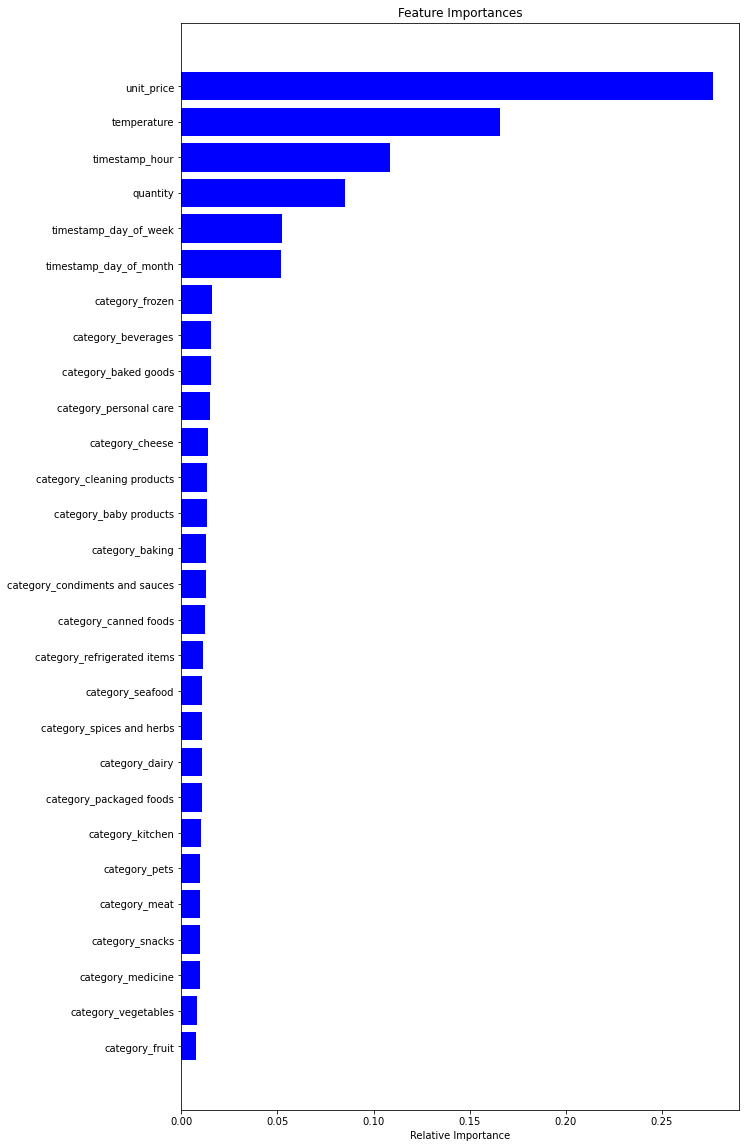

In [15]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## This feature importance visualisation tells us:

#### 1. The product categories were not that important
#### 2. The unit price and temperature were important in predicting stock
#### 3. The hour of day was also important for predicting stock